In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data = pd.read_csv('/content/simple_linear_regression.txt', header=None, names = ['Population','Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


###Analytical Method

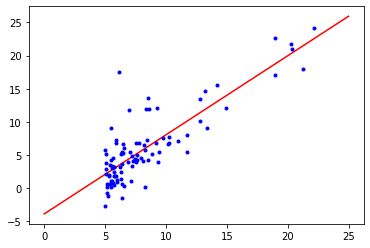

In [ ]:
X = data.iloc[:,0]
y = data.iloc[:,1]
X_b = np.c_[np.ones((97,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
X_new = np.array([[0],[25]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)

plt.plot(X_new,y_predict,'r-')
plt.plot(X,y,'b.')

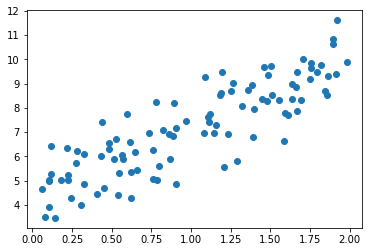

In [ ]:
X = 2 * np.random.rand(100,1)
y = 4 +3 * X+np.random.randn(100,1)
plt.scatter(X,y)

In [ ]:
X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.39319131],
       [2.76071106]])

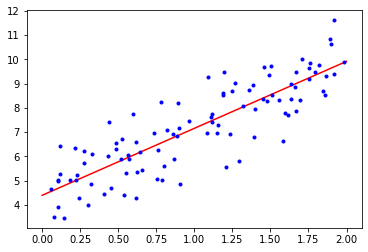

In [ ]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)

plt.plot(X_new,y_predict,'r-')
plt.plot(X,y,'b.')

###Gradient Descent

In [ ]:
def compute_cost(theta, X, y):
  m = len(y)
  predictions = np.dot(X,theta)
  cost = (1/2*m) * np.sum(np.square(predictions-y))
  return cost

In [ ]:
def gradient_descent(X,y,theta,learning_rate=0.01,iterations=100):
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for it in range(iterations):        
        prediction = np.dot(X,theta)
        theta = theta -(1/m)*learning_rate*( X.T.dot((prediction - y)))
        theta_history[it,:] =theta.T
        cost_history[it]  = compute_cost(theta,X,y)
        
    return theta, cost_history, theta_history


Theta0:          -2.439,
Theta1:          1.047
Final cost/MSE:  43942.329


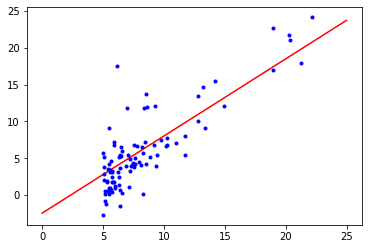

In [ ]:
lr =0.01
n_iter = 500
theta = np.random.randn(2,1)
X = (data.iloc[:,0]).to_numpy().reshape(97,1)
y = (data.iloc[:,1]).to_numpy().reshape(97,1)
X_b = np.c_[np.ones((97,1)),X]
theta,cost_history,theta_history = gradient_descent(X_b,y,theta,lr,n_iter)

print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))
X_new = np.array([[0],[25]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta)

plt.plot(X_new,y_predict,'r-')
plt.plot(X,y,'b.')

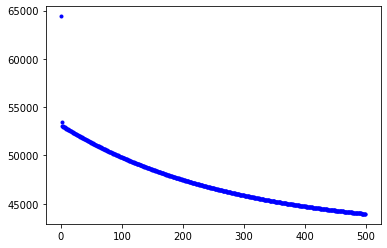

In [ ]:
fig,ax = plt.subplots(figsize=(6,4))
_=ax.plot(range(n_iter),cost_history,'b.')

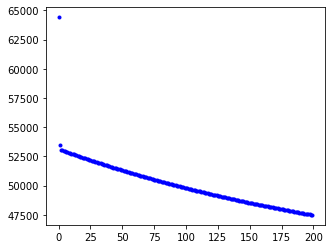

In [ ]:
fig,ax = plt.subplots(figsize=(5,4))
_=ax.plot(range(200),cost_history[:200],'b.')

In [ ]:
def plot_GD(n_iter, lr, ax, ax1 = None):
  _ = ax.plot(X,y,'b.')
  theta = np.random.randn(2,1)

  tr = 0.1
  cost_history = np.zeros(n_iter)
  for i in range(n_iter):
    pred_prev = np.dot(X_b, theta)
    theta, h, _ = gradient_descent(X_b,y,theta,lr,1)
    pred = np.dot(X_b, theta)

    cost_history[i] = h[0]

    if ((i % 25 == 0) ):
      _ = ax.plot(X,pred,'r-',alpha=tr)
      if tr < 0.8:
        tr = tr+0.2
  if not ax1== None:
    _ = ax1.plot(range(n_iter),cost_history,'b.') 

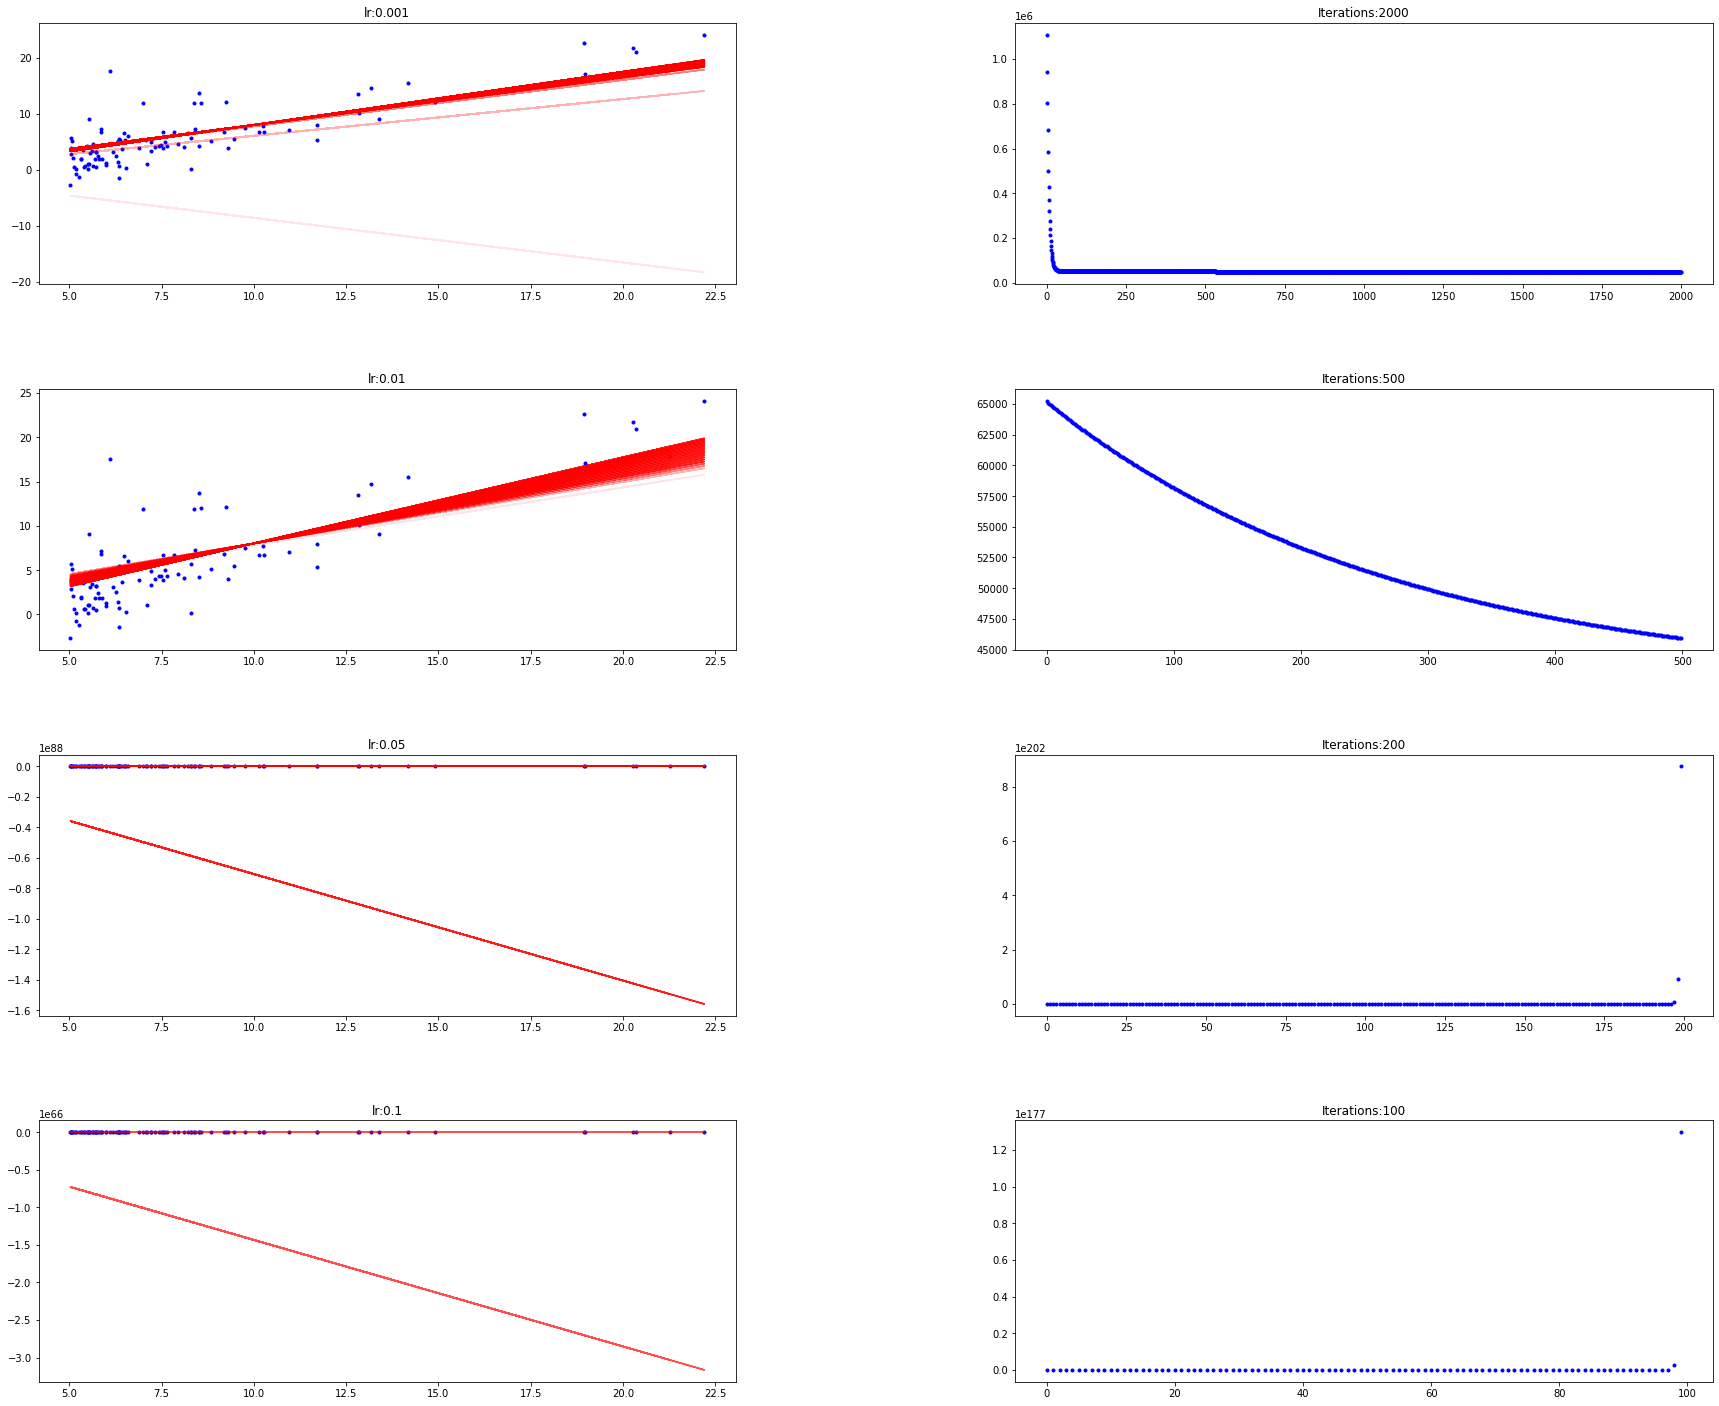

In [ ]:
fig = plt.figure(figsize=(30,25))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

it_lr =[(2000,0.001),(500,0.01),(200,0.05),(100,0.1)]
count =0
for n_iter, lr in it_lr:
    count += 1
    
    ax = fig.add_subplot(4, 2, count)
    count += 1
   
    ax1 = fig.add_subplot(4,2,count)
    
    ax.set_title("lr:{}".format(lr))
    ax1.set_title("Iterations:{}".format(n_iter))
    plot_GD(n_iter,lr,ax,ax1)
    